In [ ]:
# Import some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Use just the temperature feature and ignore the date
dataset_training = pd.read_csv('training.csv')
print(dataset_training)
train_set = dataset_training.iloc[:, 1:2].values
print(train_set)

     Date time  Temperature  Unnamed: 2  Unnamed: 3  Unnamed: 4
0       1/1/11         68.9         NaN         NaN         NaN
1       1/2/11         66.4         NaN         NaN         NaN
2       1/3/11         68.7         NaN         NaN         NaN
3       1/4/11         71.4         NaN         NaN         NaN
4       1/5/11         69.3         NaN         NaN         NaN
...        ...          ...         ...         ...         ...
3098   6/26/19         75.7         NaN         NaN         NaN
3099   6/27/19         75.0         NaN         NaN         NaN
3100   6/28/19         72.7         NaN         NaN         NaN
3101   6/29/19         71.0         NaN         NaN         NaN
3102   6/30/19         70.8         NaN         NaN         NaN

[3103 rows x 5 columns]
[[68.9]
 [66.4]
 [68.7]
 ...
 [72.7]
 [71. ]
 [70.8]]


In [ ]:
# Remove NaN values - have to reshape afterwards so it works with the MinMaxScaler
#train_set = train_set[~np.isnan(train_set)]
train_set = np.nan_to_num(train_set)
train_set = train_set.reshape(-1, 1)

In [ ]:
# Standardize the data
from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = MS.fit_transform(train_set)
train_set_scaled.shape

(3103, 1)

In [ ]:
# Now we need to create a table with 30 timestep and one output
X_train = []
Y_train = []

for i in range(30, 3103):
    X_train.append(train_set_scaled[i - 30:i, 0])
    Y_train.append(train_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
# Display X_train
X_train

array([[0.75714286, 0.72967033, 0.75494505, ..., 0.7989011 , 0.76703297,
        0.78241758],
       [0.72967033, 0.75494505, 0.78461538, ..., 0.76703297, 0.78241758,
        0.79340659],
       [0.75494505, 0.78461538, 0.76153846, ..., 0.78241758, 0.79340659,
        0.79010989],
       ...,
       [0.92747253, 0.92087912, 0.92417582, ..., 0.84395604, 0.83186813,
        0.82417582],
       [0.92087912, 0.92417582, 0.9021978 , ..., 0.83186813, 0.82417582,
        0.7989011 ],
       [0.92417582, 0.9021978 , 0.91648352, ..., 0.82417582, 0.7989011 ,
        0.78021978]])

In [ ]:
# Display Y_train
Y_train

array([0.79340659, 0.79010989, 0.7967033 , ..., 0.7989011 , 0.78021978,
       0.77802198])

In [ ]:
# Reshape as we only consider one feature
X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1], 1))
X_train

array([[[0.75714286],
        [0.72967033],
        [0.75494505],
        ...,
        [0.7989011 ],
        [0.76703297],
        [0.78241758]],

       [[0.72967033],
        [0.75494505],
        [0.78461538],
        ...,
        [0.76703297],
        [0.78241758],
        [0.79340659]],

       [[0.75494505],
        [0.78461538],
        [0.76153846],
        ...,
        [0.78241758],
        [0.79340659],
        [0.79010989]],

       ...,

       [[0.92747253],
        [0.92087912],
        [0.92417582],
        ...,
        [0.84395604],
        [0.83186813],
        [0.82417582]],

       [[0.92087912],
        [0.92417582],
        [0.9021978 ],
        ...,
        [0.83186813],
        [0.82417582],
        [0.7989011 ]],

       [[0.92417582],
        [0.9021978 ],
        [0.91648352],
        ...,
        [0.82417582],
        [0.7989011 ],
        [0.78021978]]])

In [ ]:
# Start setting up the LSTM model
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense
import tensorflow as tf
opt = tf.keras.optimizers.experimental.AdamW(learning_rate = 0.001)
regressor = Sequential()
# Add initial LSTM layer with Dropout
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))
# Add second LSTM layer with Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
# Add third LSTM layer with Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
# Add fourth LSTM layer with Dropout
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))
# Add the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compile the model
regressor.compile(optimizer = 'adam', loss = 'mse')
regressor.fit(x = X_train, y = Y_train, batch_size = 32, epochs = 250)

Epoch 1/250
97/97 [==============================] - 9s 11ms/step - loss: 0.0438
Epoch 2/250
97/97 [==============================] - 1s 11ms/step - loss: 0.0147
Epoch 3/250
97/97 [==============================] - 1s 10ms/step - loss: 0.0139
Epoch 4/250
97/97 [==============================] - 1s 11ms/step - loss: 0.0126
Epoch 5/250
97/97 [==============================] - 1s 10ms/step - loss: 0.0232
Epoch 6/250
97/97 [==============================] - 1s 13ms/step - loss: 0.0133
Epoch 7/250
97/97 [==============================] - 1s 15ms/step - loss: 0.0121
Epoch 8/250
97/97 [==============================] - 1s 11ms/step - loss: 0.0128
Epoch 9/250
97/97 [==============================] - 1s 10ms/step - loss: 0.0116
Epoch 10/250
97/97 [==============================] - 1s 10ms/step - loss: 0.0114
Epoch 11/250
97/97 [==============================] - 1s 11ms/step - loss: 0.0110
Epoch 12/250
97/97 [==============================] - 1s 11ms/step - loss: 0.0106
Epoch 13/250
97/97 [=====

In [ ]:
# Load the testing dataset
dataset_test = pd.read_csv('testing.csv')
real_temperature = dataset_test.iloc[:, 1:2].values

In [ ]:
# Show the shape of the testing dataset
dataset_test.shape

(32, 2)

In [ ]:
# Create a total dataset by concatenating training and testing together
dataset_total = pd.concat((dataset_training['Temperature'], dataset_test['Temperature']), axis = 0)

In [ ]:
# Determine the difference in length
print(len(dataset_total) - len(dataset_test) - 30)

3073


In [ ]:
# Create the inputs from the total dataset
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30: ].values
inputs

array([82.1, 83.4, 79.2, 80.3, 85. , 81. , 82.2, 82.8, 83.7, 82.9, 78.1,
       74.7, 76.2, 76.6, 78.4, 80.2, 80.1, 79.5, 78.7, 77.2, 76.9, 76. ,
       74.5, 76.6, 76.8, 75.7, 75. , 72.7, 71. , 70.8, 73.4, 71.6, 71.7,
       71.6, 71.3, 73.1, 73.8, 73.1, 74.4, 73.4, 74.5, 75.3, 74.5, 73.3,
       76.3, 74.4, 74.3, 74.6, 72.7, 73.2, 76.7, 75.4, 75.9, 73. , 74.4,
       75.5, 76.4, 71.3, 80. , 85. , 81. , 81. ])

In [ ]:
# Now we must reshape the inputs to have only 1 column
inputs = inputs.reshape(-1, 1)
inputs

array([[82.1],
       [83.4],
       [79.2],
       [80.3],
       [85. ],
       [81. ],
       [82.2],
       [82.8],
       [83.7],
       [82.9],
       [78.1],
       [74.7],
       [76.2],
       [76.6],
       [78.4],
       [80.2],
       [80.1],
       [79.5],
       [78.7],
       [77.2],
       [76.9],
       [76. ],
       [74.5],
       [76.6],
       [76.8],
       [75.7],
       [75. ],
       [72.7],
       [71. ],
       [70.8],
       [73.4],
       [71.6],
       [71.7],
       [71.6],
       [71.3],
       [73.1],
       [73.8],
       [73.1],
       [74.4],
       [73.4],
       [74.5],
       [75.3],
       [74.5],
       [73.3],
       [76.3],
       [74.4],
       [74.3],
       [74.6],
       [72.7],
       [73.2],
       [76.7],
       [75.4],
       [75.9],
       [73. ],
       [74.4],
       [75.5],
       [76.4],
       [71.3],
       [80. ],
       [85. ],
       [81. ],
       [81. ]])

In [ ]:
# Scale the inputs using the same MinMaxScaler from earlier
inputs = MS.transform(inputs)

In [ ]:
# Create the X_test variable
X_test = []
for i in range(31, 62): 
    X_test.append(inputs[i - 30: i, 0])
X_test=np.array(X_test)
X_test = np.reshape(X_test, newshape = (X_test.shape[0],  
                        X_test.shape[1], 1))

In [ ]:
# Create a predicted temperature variable based on the X_test variable
predicted_temperature = regressor.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [ ]:
# Since we have predicted the scaled values, we must reverse this using the same MinMaxScaler from earlier
predicted_temperature = MS.inverse_transform(predicted_temperature)

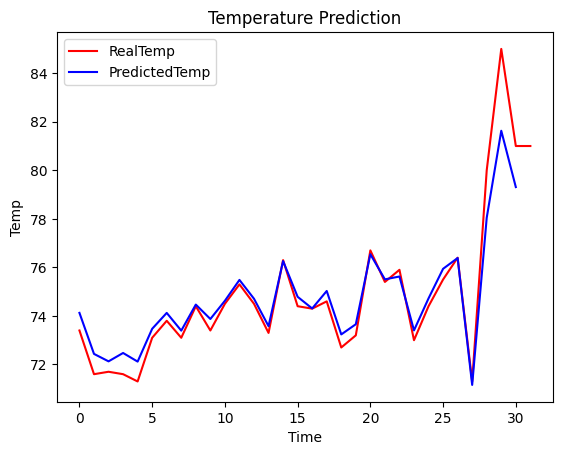

In [ ]:
# Plot the predicted temperature
plt.plot(real_temperature, color = 'Red', label = 'RealTemp')
plt.plot(predicted_temperature, color = 'Blue', label = 'PredictedTemp')
plt.title('Temperature Prediction')
plt.xlabel('Time')
plt.ylabel('Temp')
plt.legend()
plt.show()